# Ueda's Oscillator
### Dow's final project for PHYS 250, Autumn 2024


This notebook will (at some point) be made interactive. For now, it is a series of code blocks which run computations and generate visualizations for the purposes of my poster.

### What I definitely want to cover
- postiion and phase space diagrams (ie time against position and time derivative against position, respectively)
    - good example [here](https://demonstrations.wolfram.com/DynamicalBehaviorOfADuffingOscillator/) and simple but nice one [here](https://demonstrations.wolfram.com/ForcedOscillatorWithDamping/)
- another good example of a short thing on the Duffing Oscillator [here](https://demonstrations.wolfram.com/DuffingOscillator/)
- Poincaré (first-return) sections
- bifurcation diagrams to analyze transition to chaos/sensitivity to initial conditions 
    - numerically compute lyapunov exponents



#### Maybe cover
- Hopf bifurcations
    - requires finding eigenevalues, so maybe pretty complicated
- animate a flow map
- very nice set of pictures [here](https://sites.google.com/view/lyapunov-spectrum/home/other_things/japanese_attractor), maybe consider using

    

## Table of Contents
1. Introduction
2. The mathematical model
3. Numerically solving the differential equation
4. Position and phase diagrams. phase portraits could also be cool here, since they demonstrate sensitivity to inital conditions
5. Poincaré sections
6. Bifurcation diagrams
7. Hopf bifurcations
8. Flow map

### Introduction

We study the following differential equation: $$\ddot{x}+\delta\dot{x}+\alpha x^3=\gamma\cos (\omega t)$$  
where $\gamma$ is the amplitude of the driving force and $\omega$ is its angular frequency, $\delta\geq 0$ controls the damping, $\alpha$ controls the nonlinearity of the driving force. As a simplifying assumption, we assume $\omega=\alpha=1$. Not much is lost, as rescaling $x$ and $t$ allows any equation of the above form to be brought into one with $\omega=\alpha=1$. 

We may rewrite the second order differential equation as a pair of first order equations $$\begin{cases}\dot{x_1}=x_2&\\
\dot{x_2}=-\delta x_2- x_1^3+\gamma\cos t\end{cases}$$ which will be useful for our numerical solver below.

**say what this models (kid on swing, bending steel bar, whatever** 

Following Ueda, we set $\delta = 0.05$, and $\gamma = 7.5$. **actually we end up playing with this**

Quote from Ueda (pp.208) "the symmetry of the equation, associated with its invariance under the substitution $-x_1\mapsto x_1, -x_2\mapsto x_2, t+\pi\mapsto t$, implies that a periodic trajectory is either symmetric to itself with respect to the origin of the $xy$ plane or it coexists uith another periodic trajcctory, symmetric to it with respect to the origin." We illustrate each of these phenomena below.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45

In [2]:
#this block defines a function which numerically solves the ODE (via 4th order Runge-Kutta) 
# with an arbitrary set of parameters. by default, the parameters are set to Ueda's original (chaotic) parameters
#returns arrays of time values, displacement, velocities, and the last two at intervals of T for the Poincaré section
def solve_ueda(y0, t_start, t_end, max_step=0.1, delta=0.05, gamma=7.5):
    #define the system of ODEs
    def ueda(t, y):
        x1, x2 = y 
        dx1_dt = x2
        dx2_dt = -delta * x2 -  x1**3 + gamma * np.cos(t)
        return [dx1_dt, dx2_dt]

    #introduce RK45 solver
    solver = RK45(ueda, t_start, y0, t_end, max_step=max_step)

    #lists to store results
    t_values, x1_values, x2_values, poincare_x1, poincare_x2 = [], [], [], [], []

    next_poincare_time = 2*np.pi             #initialize time for next Poincaré section as the period of the driving force

    #integrate
    while solver.status == "running":
        solver.step()
        t_values.append(solver.t)
        x1_values.append(solver.y[0])
        x2_values.append(solver.y[1])

        #record Poincaré section data
        if solver.t >= next_poincare_time:
            poincare_x1.append(solver.y[0])
            poincare_x2.append(solver.y[1])
            next_poincare_time += 2*np.pi

    return t_values, x1_values, x2_values, poincare_x1, poincare_x2

In [3]:
#this block defines a function which plots the results of the above simulation
#i.e. it plots position, phase, and poincaré section plots

#when ready to export, use plt.savefig to export to save a high quality image. also chop off the beginning of the 
#phase and poincare data to make the graphs cleaner and remove transients

#it might be smart to plot the chaotic solution separately, with a much longer time scale and sensitivity
def plot_ueda(t_values, x1_values, x2_values, poincare_x1, poincare_x2, title_suffix=""):
    plt.figure(figsize=(14, 8))

    #displacement vs. time
    plt.subplot(3, 1, 1)
    plt.plot(t_values, x1_values, label="Displacement (x1)", color="blue")
    plt.xlim(-2, 50)
    plt.xlabel("Time (t)")
    plt.ylabel("Displacement (x1)")
    plt.title(f"Time Domain {title_suffix}")
    plt.grid()

    '''#this plots a phase plot with coloring for time. it shows the transients very well
    plt.subplot(3, 1, 2)
    scatter = plt.scatter(x1_values, x2_values, c=t_values, cmap='viridis', s=1)
    plt.colorbar(scatter, label="Time (t)")
    plt.xlabel("Displacement (x1)")
    plt.ylabel("Velocity (x2)")
    plt.title(f"Phase Space with Time Coloring {title_suffix}")
    plt.grid()
    #'''
    
    #''' this plots 
    #phase plot (velocity vs. displacement) for last 1000 time. for big t_end will want to make this larger
    plt.subplot(3, 1, 2)
    plt.plot(x1_values[-1000:], x2_values[-1000:], label="Phase Space (x2 vs x1)", color="orange")
    plt.xlabel("Displacement (x1)")
    plt.ylabel("Velocity (x2)")
    plt.title(f"Phase Space {title_suffix}")
    plt.grid()
   # plt.xlim(-3.5, 3.5)
    #plt.ylim(-6, 6)
    #'''

    #plot Poincaré section
    plt.subplot(3, 1, 3)
    plt.scatter(poincare_x1, poincare_x2, color="green", s=10, label="Poincaré section")
    plt.xlabel("Displacement (x1)")
    plt.ylabel("Velocity (x2)")
    plt.title(f"Poincaré Section {title_suffix}")
    plt.grid()
   # plt.xlim(-.5, 3.5)
   # plt.ylim(-6, 6)

    plt.tight_layout()
    plt.show()

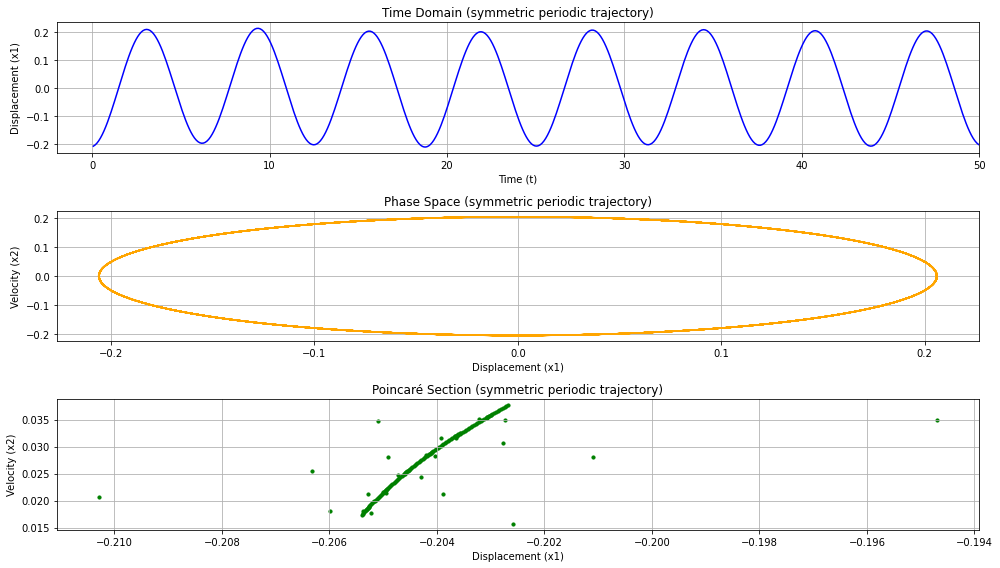

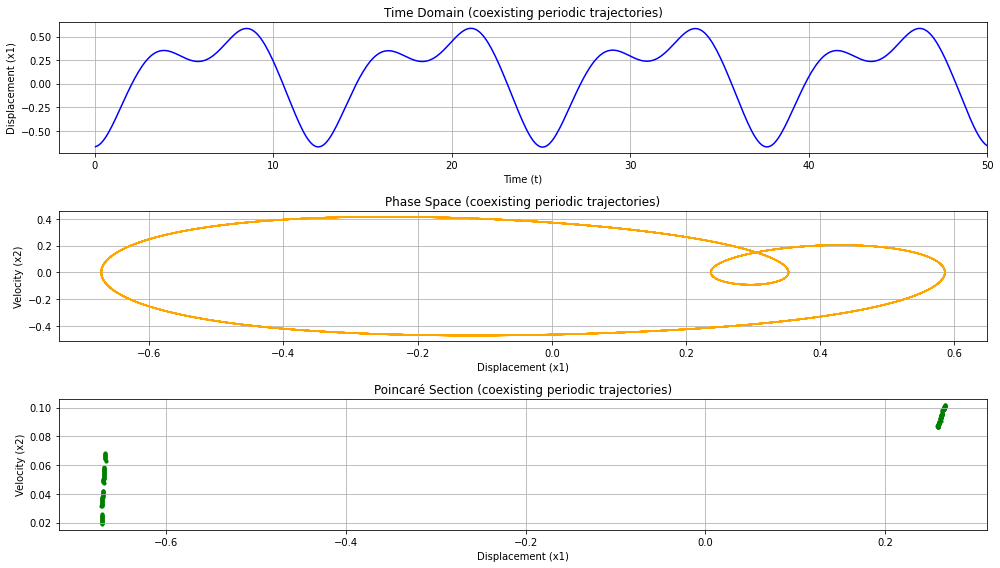

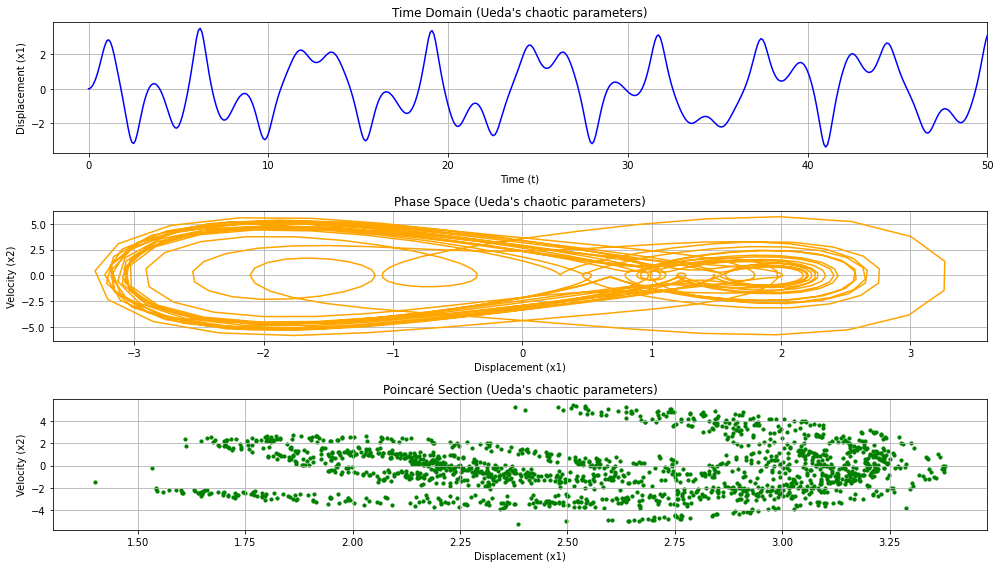

In [4]:
params1 = {"y0": [-0.21, 0.02], "t_start": 0.0, "t_end": 1000.0, "max_step":0.1, "delta": 0.08, "gamma": 0.2}
t1, x1_1, x2_1, p_x1_1, p_x2_1 = solve_ueda(**params1)
plot_ueda(t1, x1_1, x2_1, p_x1_1, p_x2_1, title_suffix="(symmetric periodic trajectory)")


params2 = {"y0": [-0.67, 0.02], "t_start": 0.0, "t_end": 1000.0, "max_step":0.1, "delta": 0.08, "gamma": 0.2}
t2, x1_2, x2_2, p_x1_2, p_x2_2 = solve_ueda(**params2)
plot_ueda(t2, x1_2, x2_2, p_x1_2, p_x2_2, title_suffix="(coexisting periodic trajectories)")


params3 = {"y0": [0.0, 0.0], "t_start": 0.0, "t_end": 10000.0, "max_step":0.1}
t3, x1_3, x2_3, p_x1_3, p_x2_3 = solve_ueda(**params3)
plot_ueda(t3, x1_3, x2_3, p_x1_3, p_x2_3, title_suffix="(Ueda's chaotic parameters)")

In [5]:
#might shelve this
'''
def plot_phase_portrait(delta, gamma, initial_conditions, t_start, t_end, max_step=0.1, title="Phase Portrait", figsize=(14, 8)):
    plt.figure(figsize=figsize)

    #solve Ueda's oscillator for each initial condition
    for y0 in initial_conditions:
        t_values, x1_values, x2_values, _, _ = solve_ueda(y0, t_start, t_end, max_step, delta, gamma)
        plt.plot(x1_values, x2_values, linewidth=0.8, label=f"Initial: {y0}")
    
    
    plt.xlabel("Displacement (x1)")
    plt.ylabel("Velocity (x2)")
    plt.title(title)
    plt.grid()
    plt.show()
    

initial_conditions = [0, 0], [-1, -1], [1, 1], [1, 0], [0, 1]

#[[0.1 * i, 0.1 * j] for i in range(-5, 5) for j in range(-5, 5)]

plot_phase_portrait(0.05, 8.5, initial_conditions, 0, 500, title="Phase Portrait for Ueda's chaotic Oscillator (insensitive to initial conditions)")
plot_phase_portrait(0.08, 0.2, initial_conditions, 0, 500, title="Phase Portrait for Ueda's chaotic Oscillator (two periodic attractors)")
'''

'\ndef plot_phase_portrait(delta, gamma, initial_conditions, t_start, t_end, max_step=0.1, title="Phase Portrait", figsize=(14, 8)):\n    plt.figure(figsize=figsize)\n\n    #solve Ueda\'s oscillator for each initial condition\n    for y0 in initial_conditions:\n        t_values, x1_values, x2_values, _, _ = solve_ueda(y0, t_start, t_end, max_step, delta, gamma)\n        plt.plot(x1_values, x2_values, linewidth=0.8, label=f"Initial: {y0}")\n    \n    \n    plt.xlabel("Displacement (x1)")\n    plt.ylabel("Velocity (x2)")\n    plt.title(title)\n    plt.grid()\n    plt.show()\n    \n\ninitial_conditions = [0, 0], [-1, -1], [1, 1], [1, 0], [0, 1]\n\n#[[0.1 * i, 0.1 * j] for i in range(-5, 5) for j in range(-5, 5)]\n\nplot_phase_portrait(0.05, 8.5, initial_conditions, 0, 500, title="Phase Portrait for Ueda\'s chaotic Oscillator (insensitive to initial conditions)")\nplot_phase_portrait(0.08, 0.2, initial_conditions, 0, 500, title="Phase Portrait for Ueda\'s chaotic Oscillator (two periodic a

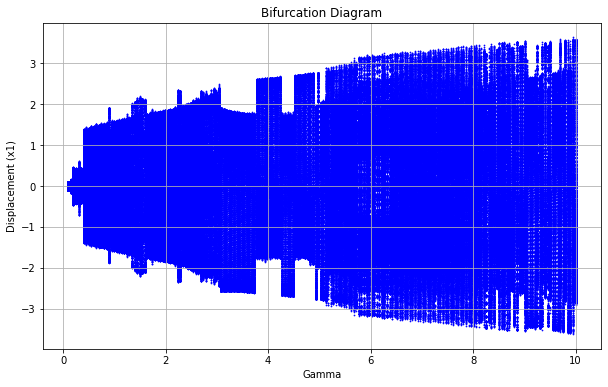

In [17]:
#this block defines functions which generate bifurcation diagrams for the gamma parameter
def bifurcation_diagram_gamma(gamma_range, delta=0.05, y0=[0, 0], t_start=0, t_end=500, max_step=0.1, transient_cutoff=100):
    bifurcation_data = []

    for gamma in gamma_range:
        t_values, x1_values, _, _, _ = solve_ueda(y0, t_start, t_end, max_step, delta, gamma)
        
        #remove transient data
        steady_state_x1 = x1_values[int(len(x1_values) * transient_cutoff / t_end):]
        
        #store parameter and corresponding x1 values
        bifurcation_data.extend((gamma, x1) for x1 in steady_state_x1)

    #extract and plot bifurcation diagram
    gammas, x1s = zip(*bifurcation_data)
    plt.figure(figsize=(10, 6))
    plt.scatter(gammas, x1s, s=0.5, color="blue")
    plt.xlabel("Gamma")
    plt.ylabel("Displacement (x1)")
    plt.title("Bifurcation Diagram")
    plt.grid()
    plt.show()
    

gamma_range = np.linspace(0.1, 10, 200) 
bifurcation_diagram_gamma(gamma_range, delta=0.05)


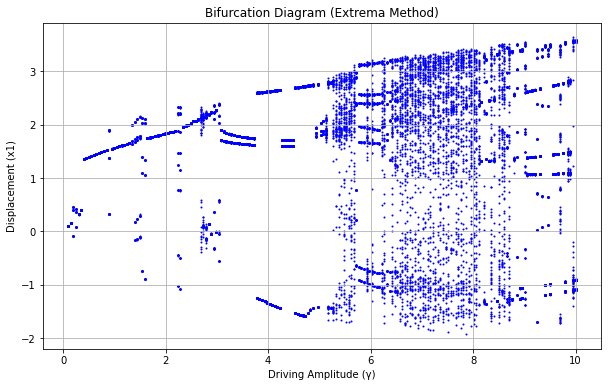

In [16]:
from scipy.signal import find_peaks

def bifurcation_diagram_extrema_gamma(gamma_values, delta=0.05, y0=[0, 0], t_start=0, t_end=500, discard_fraction=0.5, max_step=0.1):
    bifurcation_data = []

    for gamma in gamma_values:
        # Solve the oscillator for the current gamma
        t_values, x1_values, _, _, _ = solve_ueda(y0, t_start, t_end, max_step, delta, gamma)
        
        # Discard transients
        discard_index = int(discard_fraction * len(t_values))
        t_values = t_values[discard_index:]
        x1_values = x1_values[discard_index:]
        
        # Find local maxima of x1
        peaks, _ = find_peaks(x1_values)
        maxima = [x1_values[i] for i in peaks]
        
        # Store maxima and the corresponding gamma
        bifurcation_data.extend([(gamma, m) for m in maxima])
    
    # Convert to a format suitable for plotting
    gammas, extrema = zip(*bifurcation_data)
    
    # Plot the bifurcation diagram
    plt.figure(figsize=(10, 6))
    plt.scatter(gammas, extrema, s=1, color='blue')
    plt.xlabel("Driving Amplitude (γ)")
    plt.ylabel("Displacement (x1)")
    plt.title("Bifurcation Diagram (Extrema Method)")
    plt.grid()
    plt.show()

# Define gamma range and run
gamma_range = np.linspace(0.1, 10, 200)
bifurcation_diagram_extrema_gamma(gamma_range)
